In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect("database.sqlite")

tables = ['Country', 'League', 'Match', 'Player', 'Player_Attributes', 'Team', 'Team_Attributes']

df_country = pd.read_sql_query("SELECT * FROM Country", conn)
df_league = pd.read_sql_query("SELECT * FROM League", conn)
df_match = pd.read_sql_query("SELECT * FROM Match", conn)
df_player = pd.read_sql_query("SELECT * FROM Player", conn)
df_player_attributes = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
df_team = pd.read_sql_query("SELECT * FROM Team", conn)
df_team_attributes = pd.read_sql_query("SELECT * FROM Team_Attributes", conn)

conn.close()

In [2]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [3]:
df_player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
print(df_player_attributes.columns)
df_player.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')


Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')

In [5]:
players = pd.merge(df_player, df_player_attributes, on='player_fifa_api_id', how='inner')  # Inner join
players.head()

,id_x,player_api_id_x,player_name,player_fifa_api_id,birthday,height,weight,id_y,player_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,505942,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,505942,2015-11-19 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,505942,2015-09-21 00:00:00,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,505942,2015-03-20 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,505942,2007-02-22 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [6]:
import pandas as pd

players['date'] = pd.to_datetime(players['date'])

def get_filter_year():
    year = pd.to_datetime('2015-01-01')
    return year

def aggregate_numeric(x):
    return x.mean()

def aggregate_categorical(x):
    return x.mode().iloc[0]

filter_year = get_filter_year()

filtered_players = players[players['date'] >= filter_year]

numeric_columns = filtered_players.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = filtered_players.select_dtypes(include=['object']).columns

columns_to_aggregate = [col for col in filtered_players.columns if col not in ['date', 'year']]

aggregated_players = filtered_players.groupby('player_fifa_api_id').agg({
    **{col: aggregate_numeric for col in numeric_columns if col in columns_to_aggregate},
    **{col: aggregate_categorical for col in categorical_columns if col in columns_to_aggregate}
})

print(f"Filtered and aggregated data for players from {filter_year} onwards:")
print(aggregated_players.head())
print(f"\nShape of the aggregated data: {aggregated_players.shape}")
players = aggregated_players
players.head()

Filtered and aggregated data for players from 2015-01-01 00:00:00 onwards:
                      id_x  player_api_id_x  player_fifa_api_id  height  \
player_fifa_api_id                                                        
2                   3879.0          39357.0                 2.0  182.88   
11                  9179.0          26028.0                11.0  182.88   
27                  5034.0          30630.0                27.0  175.26   
28                  6530.0         101983.0                28.0  182.88   
41                   742.0          30955.0                41.0  170.18   

                    weight      id_y  player_api_id_y  overall_rating  \
player_fifa_api_id                                                      
2                    181.0   64698.0          39357.0       69.000000   
11                   165.0  152809.5          26028.0       64.750000   
27                   161.0   83327.5          30630.0       71.900000   
28                   165.0  108608

,id_x,player_api_id_x,player_fifa_api_id,height,weight,id_y,player_api_id_y,overall_rating,potential,crossing,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,preferred_foot,attacking_work_rate,defensive_work_rate
player_fifa_api_id,,,,,,,,,,,,,,,,,,,,,
2,3879.0,39357.0,2.0,182.88,181.0,64698.0,39357.0,69.000000,69.000000,74.857143,...,13.857143,4.857143,14.857143,9.857143,11.857143,Giovanni Pasquale,1982-01-05 00:00:00,left,medium,high
11,9179.0,26028.0,11.0,182.88,165.0,152809.5,26028.0,64.750000,64.750000,60.750000,...,6.000000,7.000000,10.000000,7.000000,12.000000,Romain Rocchi,1981-10-02 00:00:00,right,medium,high
27,5034.0,30630.0,27.0,175.26,161.0,83327.5,30630.0,71.900000,71.900000,80.000000,...,9.000000,6.000000,13.000000,16.000000,7.000000,Joe Cole,1981-11-08 00:00:00,right,medium,low
28,6530.0,101983.0,28.0,182.88,165.0,108608.0,101983.0,73.333333,73.333333,24.666667,...,74.666667,73.666667,67.666667,73.333333,74.000000,Manu Herrera,1981-09-29 00:00:00,left,medium,medium
41,742.0,30955.0,41.0,170.18,150.0,12774.5,30955.0,88.000000,88.000000,79.000000,...,6.000000,13.000000,6.000000,13.000000,7.000000,Andres Iniesta,1984-05-11 00:00:00,right,high,medium


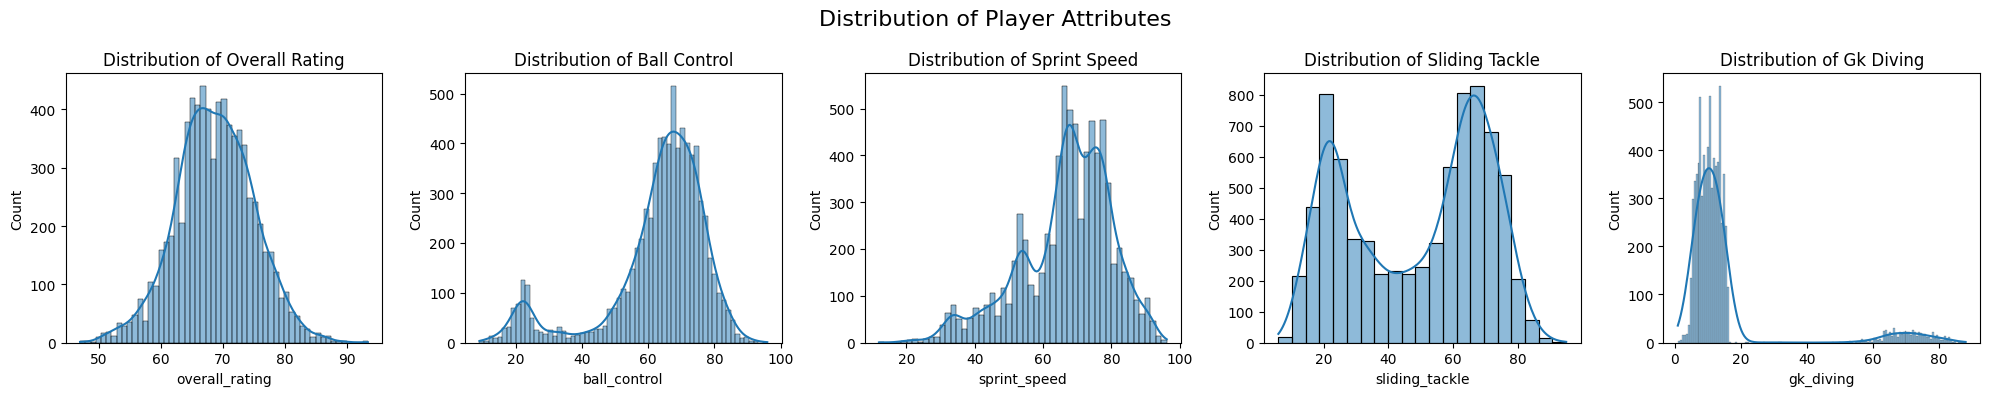

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

attributes = ['overall_rating','ball_control', 'sprint_speed', 'sliding_tackle', 'gk_diving']

n_attrs = len(attributes)
n_cols = 5
n_rows = math.ceil(n_attrs / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
fig.suptitle('Distribution of Player Attributes', fontsize=16)

axs = axs.flatten()

for i, attr in enumerate(attributes):
    sns.histplot(players[attr], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {attr.replace("_", " ").title()}')
    axs[i].set_xlabel(attr)
    axs[i].set_ylabel('Count')

for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

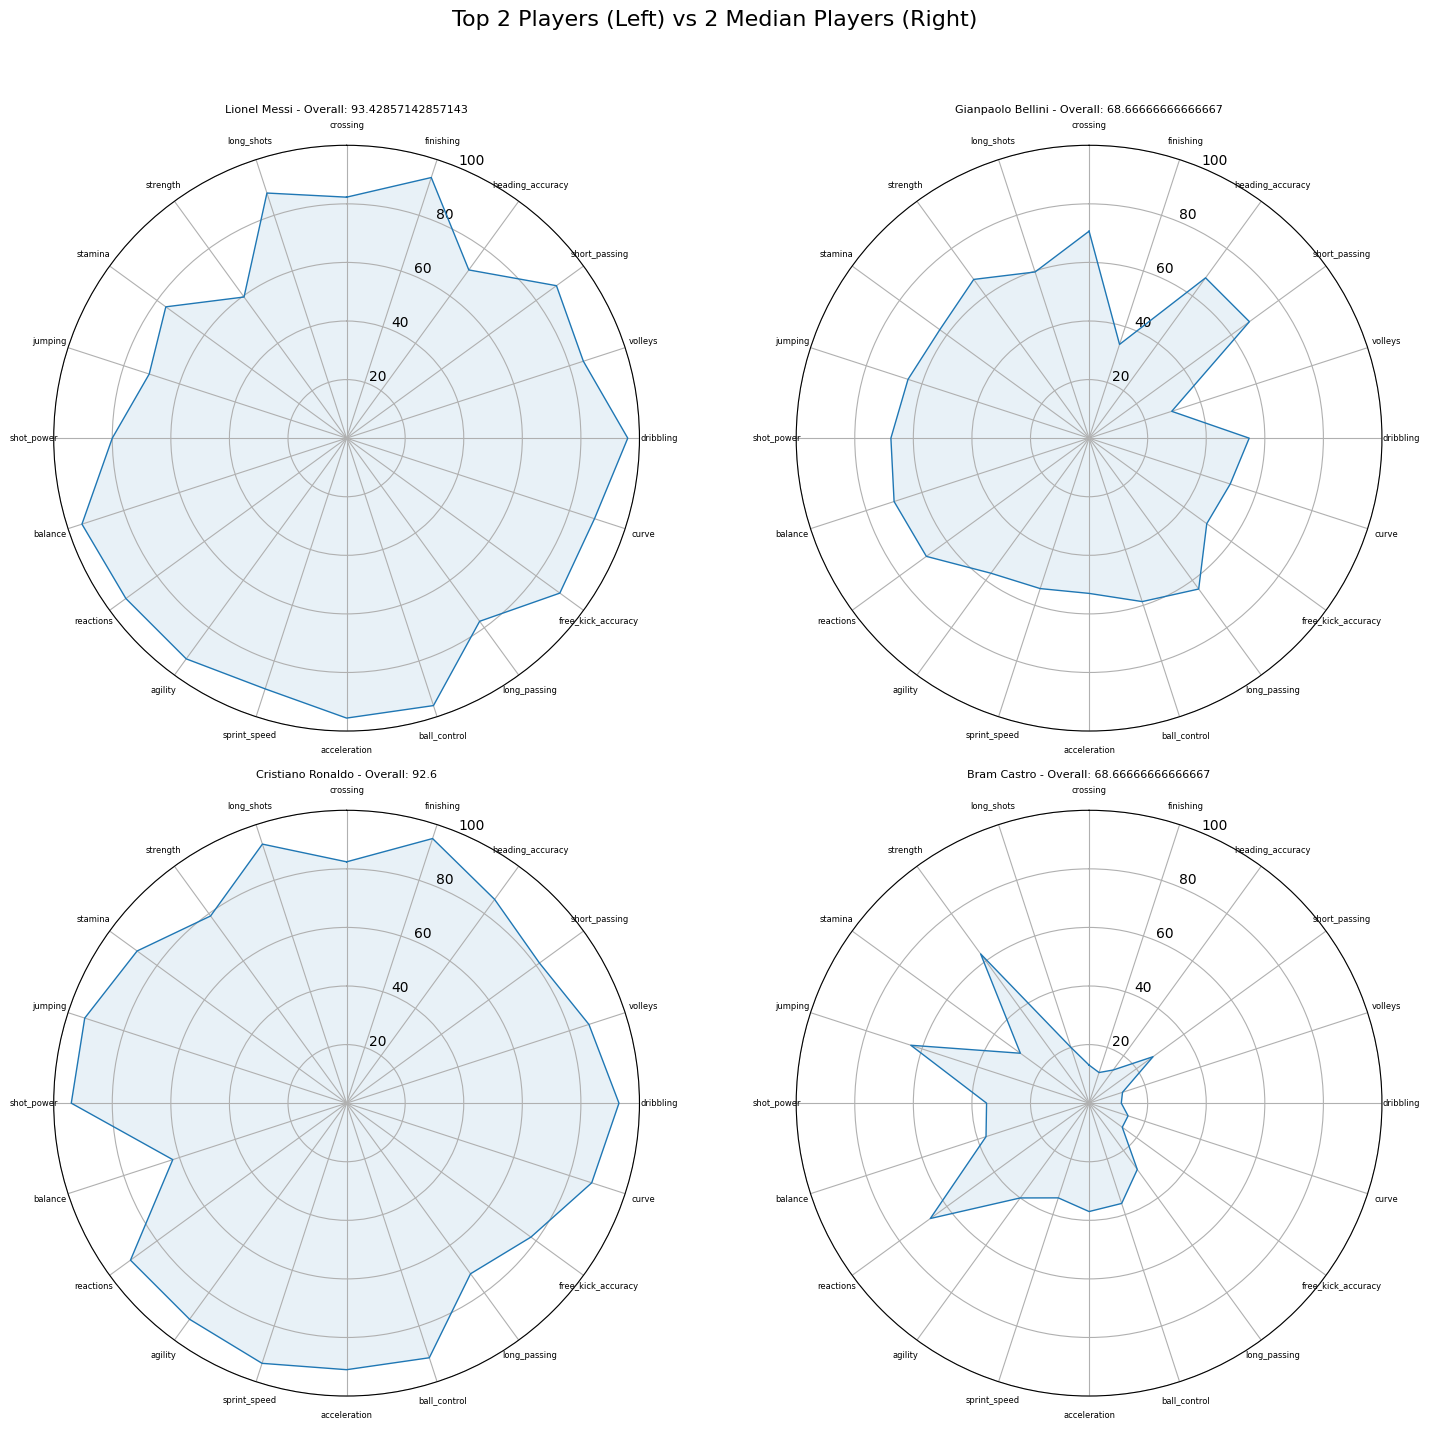

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

attributes = ['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 
              'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 
              'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 
              'shot_power', 'jumping', 'stamina', 'strength', 'long_shots']

top_5 = players.nlargest(2, 'overall_rating')
median_overall = players['overall_rating'].median()
median_5 = players.loc[(players['overall_rating'] - median_overall).abs().nsmallest(2).index]

selected_players = pd.concat([top_5, median_5])

def create_radar_chart(ax, player, attributes):
    values = player[attributes].values.flatten().tolist()
    values += values[:1]
    
    angles = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False).tolist()
    angles += angles[:1]
    
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.1)
    
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), attributes, fontsize=6)
    ax.set_ylim(0, 100)
    ax.set_title(f"{player['player_name']} - Overall: {player['overall_rating']}", fontsize=8)

fig, axs = plt.subplots(2, 2, figsize=(15,15), subplot_kw=dict(projection='polar'))
fig.suptitle('Top 2 Players (Left) vs 2 Median Players (Right)', fontsize=16)

for i, (_, player) in enumerate(selected_players.iterrows()):
    row = i % 2
    col = i // 2
    create_radar_chart(axs[row, col], player, attributes)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [9]:
players.columns

Index(['id_x', 'player_api_id_x', 'player_fifa_api_id', 'height', 'weight',
       'id_y', 'player_api_id_y', 'overall_rating', 'potential', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'player_name', 'birthday', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate'],
      dtype='object')